In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame
import matplotlib.font_manager as fm

plt.style.use('ggplot')
%matplotlib inline
pd.options.display.max_columns=25

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
url = 'http://stats.nba.com/stats/shotchartdetail?'\
        'CFID=&CFPARAMS=&ContextFilter=&ContextMeasure=FGA'\
        '&Counter=1000&DateFrom=&DateTo=&Direction=DESC'\
        '&GameID=0021500051&GameSegment=&LastNGames=0&LeagueID=00'\
        '&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0'\
        '&PlayerID=0&PlayerOrTeam=T&Position=&RookieYear='\
        '&Season=2015-16&SeasonSegment=&SeasonType=Regular+Season'\
        '&Sorter=PTS&TeamID=1610612744&VsConference=&VsDivision='
response = requests.get(url)
response.json().keys()

[u'resource', u'resultSets', u'parameters']

In [18]:
resource = response.json()["resource"]
resultsSets = response.json()["resultSets"]
parameters = response.json()["parameters"]
print resource
parameters

shotchartdetail


{u'AheadBehind': None,
 u'ClutchTime': None,
 u'ContextFilter': u'',
 u'ContextMeasure': u'FGA',
 u'DateFrom': None,
 u'DateTo': None,
 u'EndPeriod': None,
 u'EndRange': None,
 u'GameID': u'0021500051',
 u'GameSegment': None,
 u'LastNGames': 0,
 u'LeagueID': u'00',
 u'Location': None,
 u'Month': 0,
 u'OpponentTeamID': 0,
 u'Outcome': None,
 u'Period': 0,
 u'PlayerID': 0,
 u'PointDiff': None,
 u'Position': None,
 u'RangeType': None,
 u'RookieYear': None,
 u'Season': u'2015-16',
 u'SeasonSegment': None,
 u'SeasonType': u'Regular Season',
 u'StartPeriod': None,
 u'StartRange': None,
 u'TeamID': 1610612744,
 u'VsConference': None,
 u'VsDivision': None}

In [6]:
print type(resultsSets)

<type 'list'>


In [7]:
print len(resultsSets)

2


In [11]:
[type(r) for r in resultsSets]

[dict, dict]

In [13]:
[r.keys() for r in resultsSets]

[[u'headers', u'rowSet', u'name'], [u'headers', u'rowSet', u'name']]

In [14]:
[r['name'] for r in resultsSets]

[u'Shot_Chart_Detail', u'LeagueAverages']

In [15]:
resultsSets[0]['headers']

[u'GRID_TYPE',
 u'GAME_ID',
 u'GAME_EVENT_ID',
 u'PLAYER_ID',
 u'PLAYER_NAME',
 u'TEAM_ID',
 u'TEAM_NAME',
 u'PERIOD',
 u'MINUTES_REMAINING',
 u'SECONDS_REMAINING',
 u'EVENT_TYPE',
 u'ACTION_TYPE',
 u'SHOT_TYPE',
 u'SHOT_ZONE_BASIC',
 u'SHOT_ZONE_AREA',
 u'SHOT_ZONE_RANGE',
 u'SHOT_DISTANCE',
 u'LOC_X',
 u'LOC_Y',
 u'SHOT_ATTEMPTED_FLAG',
 u'SHOT_MADE_FLAG']

In [17]:
resultsSets[0]['rowSet'][0]

[u'Shot Chart Detail',
 u'0021500051',
 4,
 203084,
 u'Harrison Barnes',
 1610612744,
 u'Golden State Warriors',
 1,
 11,
 27,
 u'Missed Shot',
 u'Turnaround Jump Shot',
 u'2PT Field Goal',
 u'Mid-Range',
 u'Left Side(L)',
 u'8-16 ft.',
 11,
 -110,
 46,
 1,
 0]

Let's load the `resultsSets[0]` into a dataframe using the header for column labels

In [21]:
sc_df = pd.DataFrame(resultsSets[0]['rowSet'],columns=resultsSets[0]['headers'])
sc_df.head(5)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500051,4,203084,Harrison Barnes,1610612744,Golden State Warriors,1,11,27,Missed Shot,Turnaround Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,11,-110,46,1,0
1,Shot Chart Detail,0021500051,11,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,36,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-210,188,1,1
2,Shot Chart Detail,0021500051,13,203110,Draymond Green,1610612744,Golden State Warriors,1,10,5,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-173,203,1,1
3,Shot Chart Detail,0021500051,17,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,34,Made Shot,Running Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-160,120,1,1
4,Shot Chart Detail,0021500051,26,203084,Harrison Barnes,1610612744,Golden State Warriors,1,8,35,Missed Shot,Turnaround Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,22,26,1,0


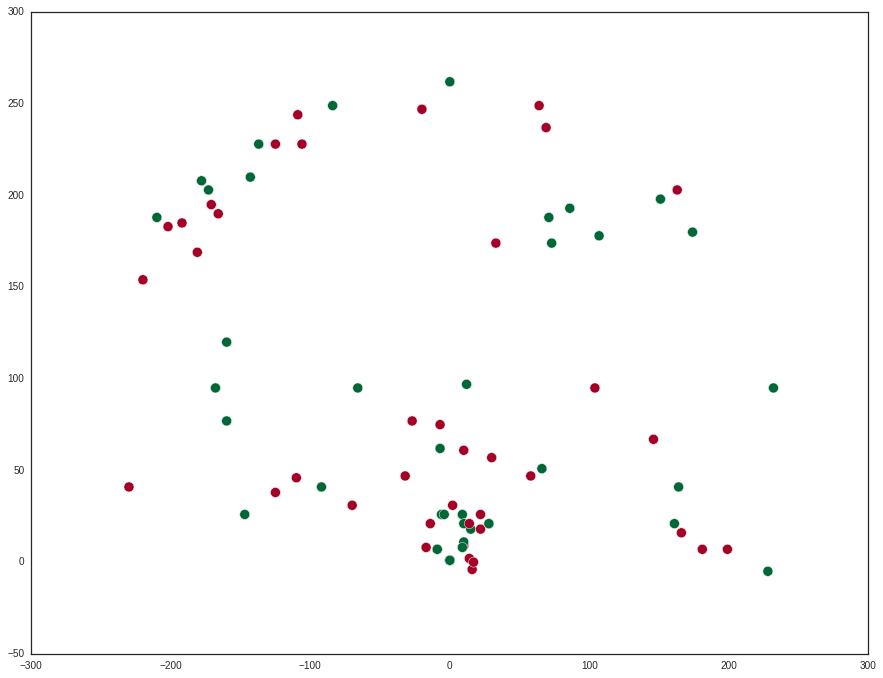

In [25]:

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(15, 11.5))

scat = plt.scatter(x=sc_df.LOC_X,y=sc_df.LOC_Y,c=sc_df.SHOT_MADE_FLAG,
    cmap=plt.cm.RdYlGn, s=100, zorder=1)
#plt.style.use('grayscale')
#court = plt.imread("img/halfcourt.png")
#img = plt.imshow(court, zorder=0, extent=[0,94,50,0])
#plt.style.use('seaborn-white')
#cbar = fig.colorbar(scat,orientation='vertical',fraction=0.025)
#cbar.ax.invert_xaxis()
#cbar.ax.set_ylabel('Ball height (ft.) above court')
# xaxis is 0-94 ft. yaxis 50-0 feet (inverted)
#import matplotlib.font_manager as fm
# zorder should be less than zorder of scatter, so court is drawn first.
#annotation_font = fm.FontProperties(family='Bitstream Vera Sans',style='normal',size=10,weight='normal',stretch='normal')
#scat.annotate('[START] Connelly drives baseline',
#              xy = ball_xdat

#
#plt.imshow(court, zorder=0, extent=[0,94,50,0])

#plt.xlim(0,94)
plt.show()

In [ ]:

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(15, 11.5))

scat = plt.scatter(x=ball_xdat,y=ball_ydat,c=ball_zdat,
    cmap=plt.cm.RdBu, s=300, zorder=1)
plt.style.use('grayscale')
court = plt.imread("img/fullcourt.png")
img = plt.imshow(court, zorder=0, extent=[0,94,50,0])
plt.style.use('seaborn-white')
cbar = fig.colorbar(scat,orientation='vertical',fraction=0.025)
cbar.ax.invert_xaxis()
cbar.ax.set_ylabel('Ball height (ft.) above court')
# xaxis is 0-94 ft. yaxis 50-0 feet (inverted)
import matplotlib.font_manager as fm
# zorder should be less than zorder of scatter, so court is drawn first.
annotation_font = fm.FontProperties(family='Bitstream Vera Sans',style='normal',size=10,weight='normal',stretch='normal')
scat.annotate('[START] Connelly drives baseline',
              xy = ball_xdat

#
#plt.imshow(court, zorder=0, extent=[0,94,50,0])

#plt.xlim(0,94)
plt.show()